In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('globalcount_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24051 entries, 0 to 24050
Data columns (total 92 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   row_id                                                   24051 non-null  int64  
 1   unique_id                                                24051 non-null  int64  
 2   survey_type                                              24051 non-null  object 
 3   iso3166                                                  24046 non-null  object 
 4   surveydate                                               24051 non-null  object 
 5   city_town                                                24049 non-null  object 
 6   city_town_tr                                             20503 non-null  object 
 7   country_of_residence                                     24050 non-null  object 
 8   gender_not_listed         

In [4]:
def gender_func(x):
    gender = []
    if x['gender_not_listed']:
        gender.append('not listed')
    if x['gender_choose_not_to_identify']:
        gender.append('undisclosed')
    if x['cisgender_man']:
        gender.append('cisgender man')
    if x['cisgender_woman']:
        gender.append('cisgender woman')
    if x['non_conforming_or_non_binary']:
        gender.append('non-binary')
    if x['transgender_man']:
        gender.append('transgender man')
    if x['transgender_woman']:
        gender.append('transgender woman')
    if x['man']:
        gender.append('man')
    if x['woman']:
        gender.append('woman')
    if gender == []:
        gender.append('undisclosed')
    
    return ', '.join(gender)

In [5]:
def race_func(y):
    race = []
    if y['white']:
        race.append('white')
    if y['asian']:
        race.append('asian')
    if y['south_asian']:
        race.append('south_asian')
    if y['southeast_asian']:
        race.append('southeast_asian')
    if y['pacific_islander']:
        race.append('pacific_islander')
    if y['north_african']:
        race.append('north_african')
    if y['native_hawaiian']:
        race.append('native_hawaiian')
    if y['native_american']:
        race.append('native_american')
    if y['middle_eastern']:
        race.append('middle_eastern')
    if y['indigenous_central_or_south_american']:
        race.append('indigenous_central_or_south_american')
    if y['indigenous']:
        race.append('indigenous')
    if y['choose_not_to_identify']:
        race.append('choose_not_to_identify')
    if y['hispanic_or_latinx']:
        race.append('hispanic_or_latinx')
    if y['black_or_of_african_descent']:
        race.append('black_or_of_african_descent')
    if y['biracial_or_mixed']:
        race.append('biracial_or_mixed')
    if y['racial_identity_not_listed']:
        race.append('racial_identity_not_listed')
    if race == []:
        race.append('undisclosed')
    
    return ', '.join(race)

In [6]:
# melting genders into one column using my gender_func

df['gender_list'] = df.apply(gender_func, axis = 1)

In [7]:
#metling race into one column using race_func
df['race_identity'] = df.apply(race_func, axis = 1)


In [8]:
issues_global = df.columns[34:46]

In [9]:
issues_local = df.columns[58:69]

In [10]:
issues_all = issues_global.append(issues_local)

In [11]:
df_long = df.melt(id_vars = [c for c in df.columns if c not in issues_all], var_name = 'issue')

In [12]:
df_long.head()

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,choose_not_to_identify,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,barrier_person_civil_rights_and_freedoms,barrier_person_disability_rights,barrier_person_economic_and_workers_rights,barrier_person_education_and_youth_empowerment,barrier_person_ending_violence_harassment_and_abuse,barrier_person_environmental_justice,barrier_person_immigrant_and_refugee_rights,barrier_person_indigenous_andor_roma_rights,barrier_person_LGBTQI+_rights,barrier_racial_equity,barrier_person_reproductive_freedom_and_bodily_autonomy,barrier_person_sexual_reproductive_and_parental_health,issue_city_sexual_reproductive_and_parental_health,barrier_city_civil_rights_and_freedoms,barrier_city_disability_rights,barrier_city_economic_and_workers_rights,barrier_city_education_and_youth_empowerment,barrier_city_ending_violence_harassment_and_abuse,barrier_city_environmental_justice,barrier_city_immigrant_and_refugee_rights,barrier_city_indigenous_andor_roma_rights,barrier_city_LGBTQI+_rights,barrier_city_racial_equity,barrier_city_reproductive_freedom_and_bodily_autonomy,barrier_city_sexual_reproductive_and_parental_health,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score,gender_list,race_identity,issue,value
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,NaN,Cultural/Social,NaN,NaN,NaN,NaN,Political,NaN,Cultural/Social,NaN,NaN,NaN,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,woman,white,issue_person_civil_rights_and_freedoms,0
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,NaN,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,Cultural/Social,NaN,NaN,NaN,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Economic,NaN,Cultural/Social,NaN,NaN,NaN,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.00,woman,white,issue_person_civil_rights_and_freedoms,0
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undisclosed,undisclosed,issue_person_civil_rights_and_freedoms,0
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45 to 54,NaN,NaN,Political,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,Cultural/Social,NaN,0,NaN,NaN,Political,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,NaN,Amnesty International,Frauenstreik Züeich,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97,woman,racial_identity_not_listed,issue_person_civil_rights_and_freedoms,0
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35 to 44,NaN,NaN,Economic,NaN,NaN,NaN,Political,NaN,Political,NaN,NaN,NaN,0,Education,NaN,NaN,NaN,NaN,NaN,Political,NaN,NaN,Education,NaN,NaN,SINGA,SINGA,NaN,More women in high political positions. Access...,SINGA,SINGA,NaN,More women in high political positions. Access...,en,1.00,not listed,asian,issue_person_civil_rights_and_freedoms,0


In [13]:
df_analysis = df_long[['age','value','country_of_residence','race_identity','issue_city_sexual_reproductive_and_parental_health']]
df_analysis.groupby(['age','country_of_residence','issue_city_sexual_reproductive_and_parental_health']).sum()
df_analysis.head()

,age,value,country_of_residence,race_identity,issue_city_sexual_reproductive_and_parental_health
0,25 to 34,0,United Kingdom of Great Britain and Northern I...,white,0
1,25 to 34,0,United Kingdom of Great Britain and Northern I...,white,0
2,NaN,0,Canada,undisclosed,0
3,45 to 54,0,Switzerland,racial_identity_not_listed,0
4,35 to 44,0,Belgium,asian,0


In [14]:
df_analysis.groupby(['issue_city_sexual_reproductive_and_parental_health']).sum().sort_values(by ='country_of_residence', ascending = False).plot.barh(title='Analysis of issues (local/city level)', figsize=(15,10), fontsize=12)


KeyError: ignored

In [15]:
df_analysis.groupby(['country_of_residence', 'issue']).get_group(('India', 'issue_person_sexual_reproductive_and_parental_health')).sum()

KeyError: ignored

In [16]:
df_long.pivot_table(index='country_of_residence', columns='issue', values='value', aggfunc='sum')

issue,issue_city_LGBTQI+_rights,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_person_LGBTQI+_rights,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,issue_person_immigrant_and_refugee_rights,issue_person_indigenous_andor_roma_rights,issue_person_racial_equity,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health
country_of_residence,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,2,1,2,1,7,2,0,0,2,1,10,137,16,99,278,505,48,100,3,45,40,46
Albania,1,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0
Algeria,1,1,0,2,1,1,0,0,1,0,0,1,4,1,0,5,4,4,1,2,3,0,0
Andorra,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,1,3,0,1,0,0,0,0
Angola,0,1,0,0,1,1,0,0,0,1,0,7,18,13,20,54,76,10,14,0,49,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
Venezuela (Bolivarian Republic of),8,34,13,70,49,79,17,17,3,7,5,33,136,117,326,245,467,94,206,5,84,25,84


In [17]:
pivot_df = df_long.pivot_table(index='country_of_residence', columns='issue', values='value', aggfunc='sum')

In [18]:
pivot_df['issue_person_sexual_reproductive_and_parental_health'].sort_values(ascending = False)[:10].reset_index()

,country_of_residence,issue_person_sexual_reproductive_and_parental_health
0,Belarus,389
1,Russian Federation,384
2,Kenya,354
3,Zimbabwe,250
4,Uganda,233
5,Zambia,215
6,United States of America,186
7,Kazakhstan,179
8,Nigeria,168
9,Liberia,157


In which country group was Sexual, Reproductive and Parental Health reported as the most critical issue?

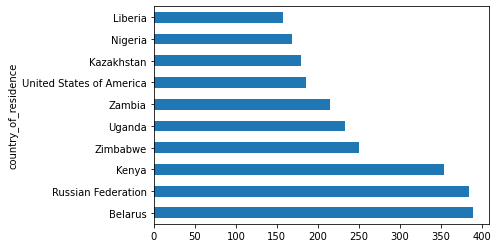

In [19]:

pivot_df['issue_person_sexual_reproductive_and_parental_health'].sort_values(ascending = False)[:10].plot.barh()

Which racial identity + gender identity group combination reported Sexual, Reproductive and Parental Health as the most critical issue they were facing?

In [28]:
pivot_df1 = df_long.pivot_table(index='gender_list', columns='issue', values='value', aggfunc='sum')

In [24]:
pivot_df1['issue_person_sexual_reproductive_and_parental_health'].sort_values(ascending = False)[:10].reset_index()

,gender_list,issue_person_sexual_reproductive_and_parental_health
0,woman,2522
1,undisclosed,879
2,"cisgender woman, woman",195
3,cisgender woman,87
4,man,69
5,"man, woman",18
6,non-binary,14
7,"non-binary, woman",10
8,"not listed, woman",9
9,"transgender woman, woman",8


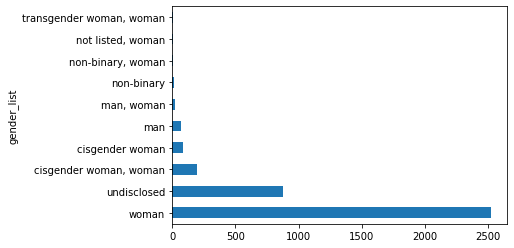

In [25]:
pivot_df1['issue_person_sexual_reproductive_and_parental_health'].sort_values(ascending = False)[:10].plot.barh()

In [29]:
pivot_df2 = df_long.pivot_table(index='race_identity', columns='issue', values='value', aggfunc='sum')

In [35]:
pivot_df2['issue_person_sexual_reproductive_and_parental_health'].sort_values(ascending = False)[:17].reset_index()

,race_identity,issue_person_sexual_reproductive_and_parental_health
0,black_or_of_african_descent,1110
1,white,896
2,undisclosed,823
3,choose_not_to_identify,198
4,asian,174
5,racial_identity_not_listed,123
6,hispanic_or_latinx,110
7,indigenous,83
8,biracial_or_mixed,68
9,north_african,26


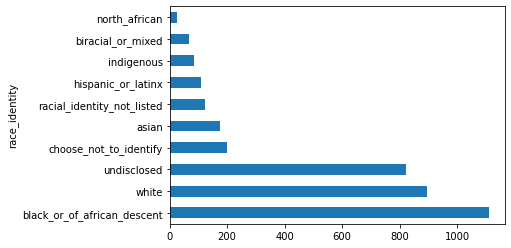

In [36]:
pivot_df2['issue_person_sexual_reproductive_and_parental_health'].sort_values(ascending = False)[:10].plot.barh()

Which (if any) racial identity group reported that Racial Equity was a critical issue that their local community faced, but not a critical issue that they personally faced?

In [38]:
pivot_df2['issue_person_racial_equity'].sort_values(ascending = False)[:17].reset_index()

,race_identity,issue_person_racial_equity
0,undisclosed,1217
1,white,1209
2,black_or_of_african_descent,742
3,choose_not_to_identify,265
4,"white, indigenous",209
5,asian,179
6,indigenous,174
7,biracial_or_mixed,146
8,racial_identity_not_listed,130
9,hispanic_or_latinx,100


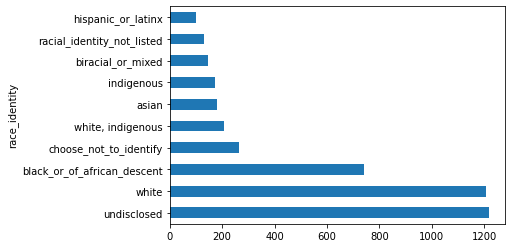

In [39]:
pivot_df2['issue_person_racial_equity'].sort_values(ascending = False)[:10].plot.barh()